# Tutorial: Machine Learning in scikit-learn
From the [Izaskun Mendia], the GitHub repository (https://github.com/izmendi/) 

![Machine learning](images/01_robot.png)

# Unsupervised Learning

Some unsupervised algorithms in scikit-learn:

![unsup_alg](images/unsupervised_alg.png)

# Clustering algorithm

Clustering of unlabeled data can be performed with the module *sklearn.cluster*.

Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity) measure, such as the Euclidean distance. Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

![Iris](images/unsupervised_workflow.svg) 

# Using KMeans to cluster data

Clustering is a very useful technique. Often, we need to divide and conquer when taking actions. Consider a list of potential customers for a business. 
KMeans is probably one of the most well-known clustering algorithms and, in a larger sense, one of the most well-known unsupervised learning techniques.
KMeans is actually a very simple algorithm that works to minimize the within-cluster sum of square distance from the mean.
It does this by first setting a pre-specified number of clusters, K, and then alternating between the following:
- Assigning each observation to the nearest cluster
- Updating each centroid by clacultaing the mean of each observation assigned to this cluster

Given the iris dataset, if we knew that there were 3 types of iris, but did not have access to a taxonomist to label them: we could try a clustering task: split the observations into well-separated group called clusters.<br/>
Note that there exist a lot of different clustering criteria and associated algorithms. The simplest clustering algorithm is K-means.

## Getting ready

In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
# import KMeans function sklearn.cluster to clustering of unlabeled data
from sklearn.cluster import KMeans
import numpy as np

In [2]:
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

Also, since we'll be doing some plottting, import *bokeh* as shown:

In [3]:
# initialize matplotlib in ipython. Allow plots to appear within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

We are going to walk throug a simple exampl that clusters iris flowers. Then we 'll talk a littlebit bout how kMeans works to find the optimal numer of iris

In [4]:
#the iris dataset is 150 samples, each with four features
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We only want petal length and petal width, so get only petal features, which are the third and fourth values in each sample.

In [5]:
petal_data = iris.data[:,2:]  # create X (features), forget response for unsupervised model
petal_data[0:5]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

In [6]:
#perform k-means analysis on iris data
#there are only 3 iris flower groups: 'setosa', 'versicolor', 'virginica'
k = 3
kmean = KMeans(n_clusters=k, random_state=71) #n_clusters asks for only 3 groupings

In [7]:
kmean.fit(petal_data)
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can use KMeans to find the centers of these clusters. In this first example, we'll pretend we know that there are three centers'

In [8]:
kmean.cluster_centers_

array([[ 1.464     ,  0.244     ],
       [ 4.26923077,  1.34230769],
       [ 5.59583333,  2.0375    ]])

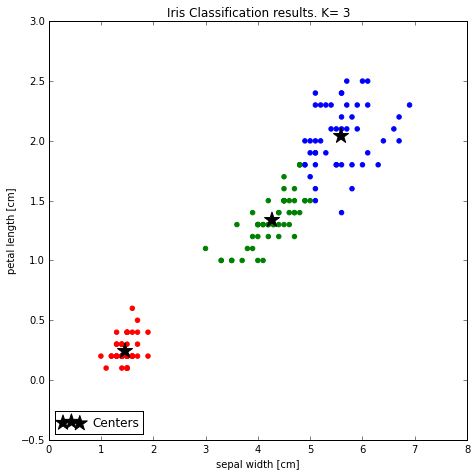

In [9]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(petal_data[:, 0], petal_data[:, 1], color=rgb[kmean.labels_])

ax.scatter(kmean.cluster_centers_[:, 0], 
               kmean.cluster_centers_[:, 1], marker='*', s=250, 
               color='black', label='Centers')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results. K= "+str(k))
plt.show()

The *labels_* attribute will produce the expected label for echa observation:

In [10]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can check whether *kmean.labels_* is the same as the already known target, but because KMeans has no knowdledge of the targets going in:

In [11]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Here, we are probably satisfied with the clustering results. But in general we might want to have a more quantitative evaluation. How about comparing our cluster labels with the ground truth we got when generating iris?

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(iris.target, kmean.labels_))
print(confusion_matrix(iris.target, kmean.labels_))

('Accuracy score:', 0.95999999999999996)
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


In [14]:
np.mean(iris.target == kmean.labels_)

0.95999999999999996

The *transformation* function is quite useful in the sense that it will output the distance between each observation and centroid:

In [15]:
kmean.transform(petal_data)[:5]

array([[ 0.07766595,  3.08826036,  4.5805484 ],
       [ 0.07766595,  3.08826036,  4.5805484 ],
       [ 0.16979988,  3.18138307,  4.67232172],
       [ 0.05685068,  2.99558107,  4.48912652],
       [ 0.07766595,  3.08826036,  4.5805484 ]])

# Optimizing the number of clusters

We'll start with a single cluster model and evaluate its similarity. This is more for the purpose of mechanics as measuring the similarity of one cluster count is clearly not useful in finding the ground truth number of clusters. We'll look at silhoutte distance (elbow method another approach to finding the optimal number of clusters).

*Silhouette* analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. We define a Sihouette:<br />
$s(i) = \frac{b(i)-a(i)}{max{a(i)-b(i)}}$<br />

Silhouette coefficients (as these values are referred to as) near to value of:
- **+1** indicates that the sample is far away from the neighboring clusters. 
- **0** indicates that the sample is on or very close to the decision boundary between two neighboring clusters, and 
- **-1** indicates that those samples might have been assigned to the wrong cluster.

In [16]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(petal_data, kmean.labels_)
silhouette_samples[:5]

array([ 0.94341483,  0.94341483,  0.92944015,  0.94175016,  0.94341483])

Notice that generally the higher the number of coefficients are closer to 1 (which is good) 
the better the score.

Let's fit the models of several cluster counts and see what the average silhouette score looks like:

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.765175550287
For n_clusters = 3 The average silhouette_score is : 0.660276088219
For n_clusters = 4 The average silhouette_score is : 0.612530696724
For n_clusters = 5 The average silhouette_score is : 0.588140346803
For n_clusters = 6 The average silhouette_score is : 0.576721695581


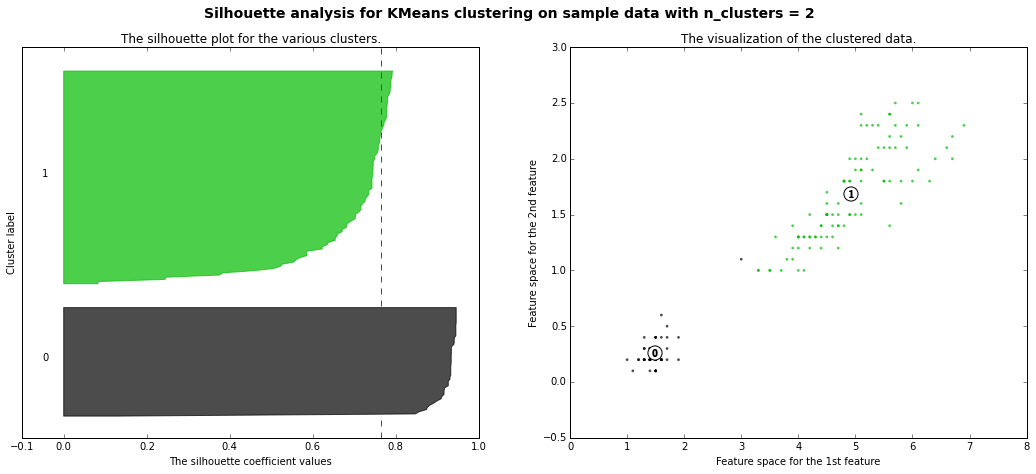

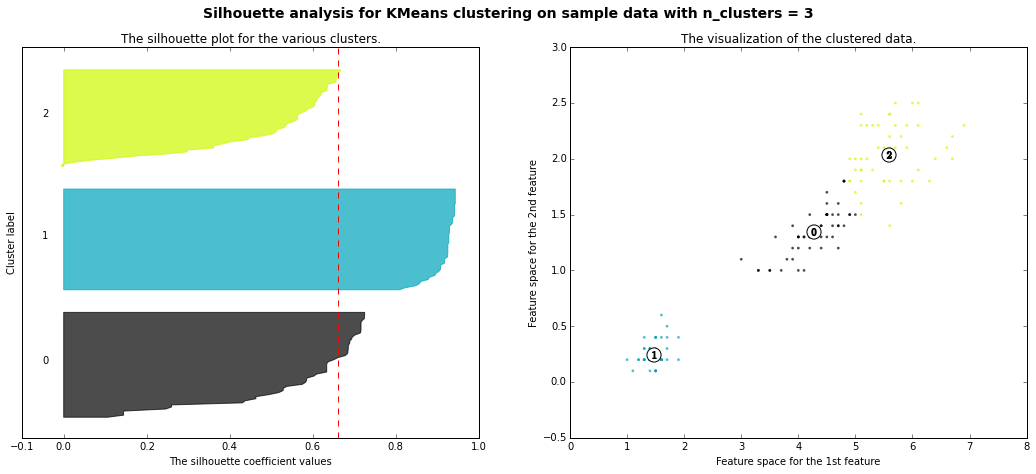

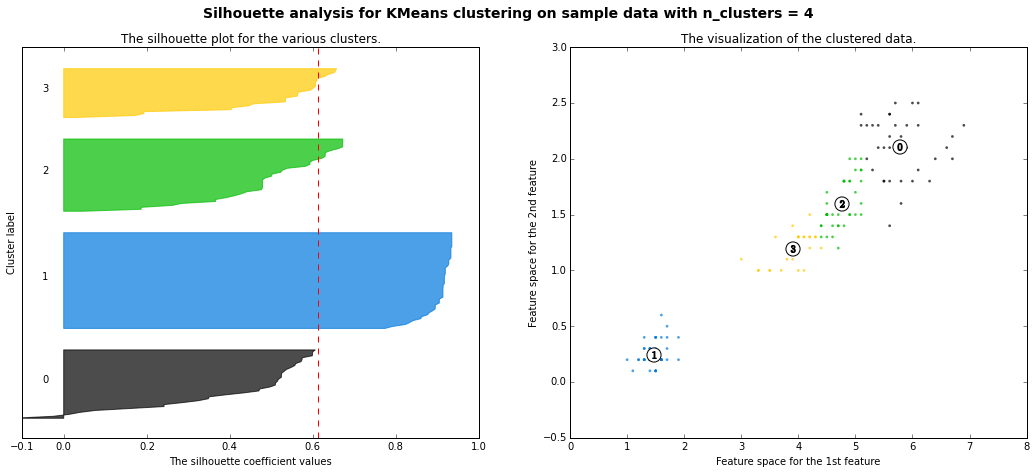

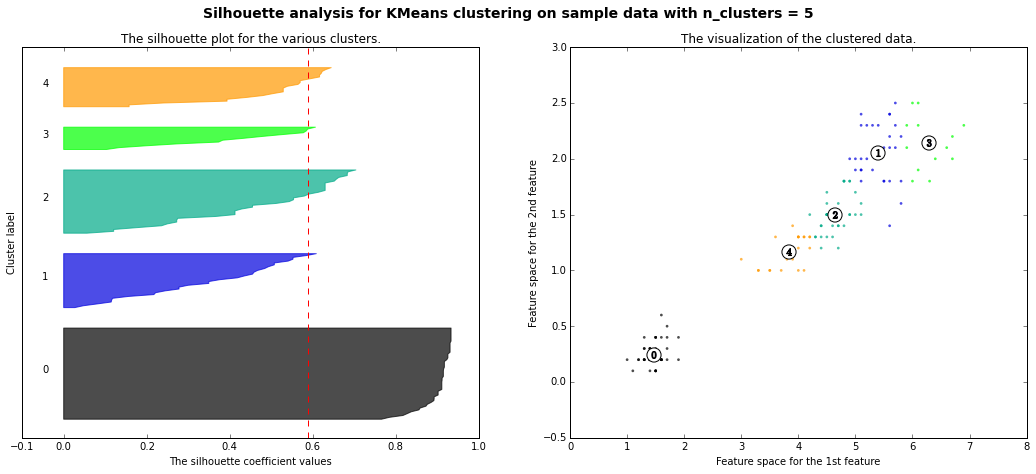

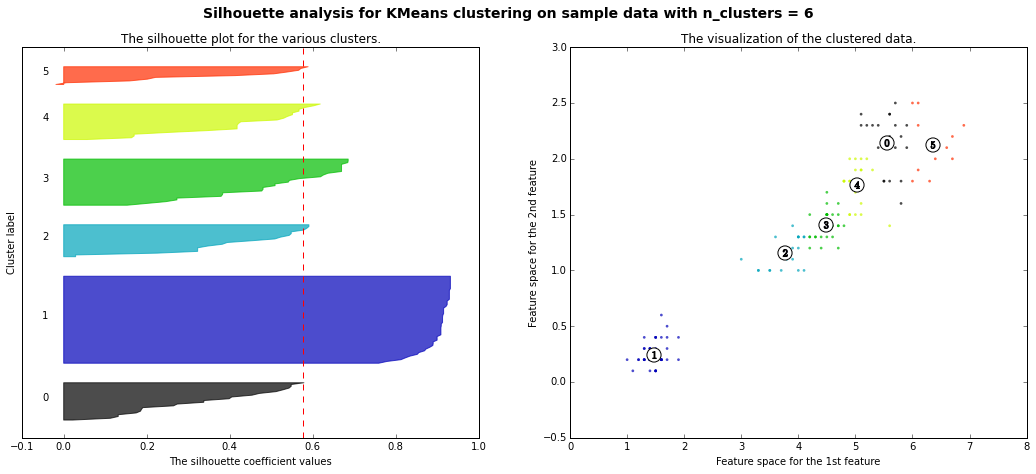

In [17]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = iris.data[:,2:]  
y = iris.target

range_n_clusters = [2, 3, 4, 5, 6]
sillhouette_avgs = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sillhouette_avgs.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

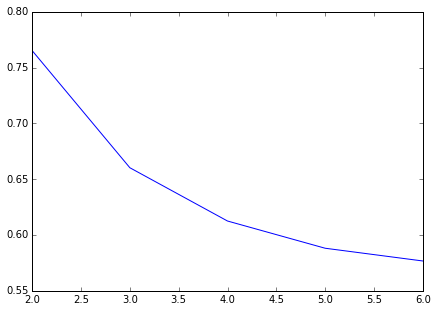

In [18]:
plt.subplots(figsize=(7, 5))
plt.plot(range_n_clusters, sillhouette_avgs)

This plot shows that the silhouette averages as the number of centroids decrease. We can see that the optimum number, according to the data generating process, is 3, but here it looks like it's around 3 or 4. This is the reality of clustering; quite often, we won't get the correct number of clusters, we can only really hope to estimate the number of clusters to some approximation.

There is absolutely no guarantee of recovering a ground truth. First, choosing the right number of clusters is hard. Second, the algorithm is sensitive to initialization, and can fall into local minima, although scikit-learn employs several tricks to mitigate this issue.

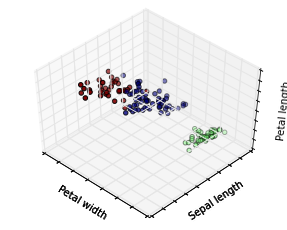

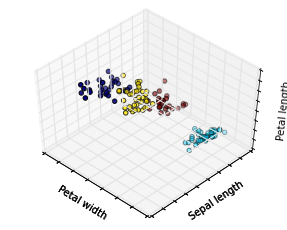

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_4': KMeans(n_clusters=4)}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1